In [219]:
from scipy.stats import ecdf, norm
import numpy as np
import seaborn as sns
from matplotlib.pyplot import vlines, show

In [220]:
seed = 42
np.random.seed(seed)

In [221]:
N = 80
alpha = 0.05

norm_rv = norm(0, 1)
norm_rvs = norm_rv.rvs(N)

In [222]:
ecdf_rvs = ecdf(norm_rvs)
ecdf_rvs.cdf.evaluate(norm_rv.mean()), norm_rv.cdf(norm_rv.mean())

(array(0.55), 0.5)

In [223]:
epsilon = np.sqrt(1 / (2 * N) * np.log(2 / alpha))
epsilon

0.1518403654770763

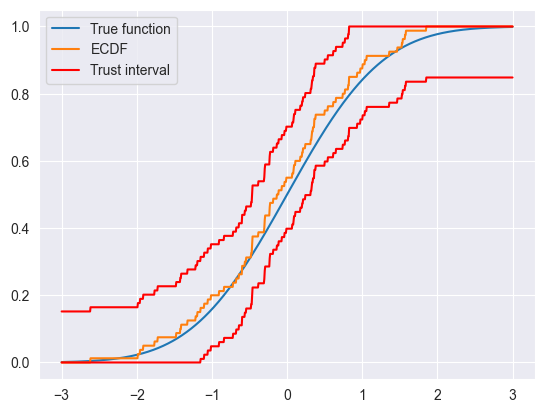

In [224]:
x = np.linspace(norm_rv.mean() - 3 * norm_rv.std(), norm_rv.mean() + 3 * norm_rv.std(), 1000)
y = norm_rv.cdf(x)

ci_u = []
ci_d = []
for pos in x:
    res = ecdf_rvs.cdf.evaluate(pos)
    ci_u.append(min(max(res + epsilon, 0.0), 1))
    ci_d.append(min(max(res - epsilon, 0.0), 1))

sns.lineplot(x=x, y=y, label='True function')
sns.lineplot(x=x, y=ecdf_rvs.cdf.evaluate(x), label='ECDF')
sns.lineplot(x=x, y=ci_u, color='r', label='Trust interval')
sns.lineplot(x=x, y=ci_d, color='r', label='Trust interval', legend=False)
show()